In [61]:
import pandas as pd 
import matplotlib.pyplot as plt

In [62]:
data=pd.read_csv('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/timeseries/univariate/acea-water-prediction/River_Arno.csv')


In [63]:
data=data.loc[:,['Date','Hydrometry_Nave_di_Rosano']]

In [64]:
data

,Date,Hydrometry_Nave_di_Rosano
0,01/01/1998,1.82
1,02/01/1998,1.94
2,03/01/1998,2.11
3,04/01/1998,1.84
4,05/01/1998,1.88
...,...,...
8212,26/06/2020,1.34
8213,27/06/2020,1.21
8214,28/06/2020,1.30
8215,29/06/2020,1.19


In [65]:
data.columns

Index(['Date', 'Hydrometry_Nave_di_Rosano'], dtype='object')

In [66]:
data['Date'] = pd.to_datetime(data['Date'],dayfirst=True)


In [67]:
data

,Date,Hydrometry_Nave_di_Rosano
0,1998-01-01,1.82
1,1998-01-02,1.94
2,1998-01-03,2.11
3,1998-01-04,1.84
4,1998-01-05,1.88
...,...,...
8212,2020-06-26,1.34
8213,2020-06-27,1.21
8214,2020-06-28,1.30
8215,2020-06-29,1.19


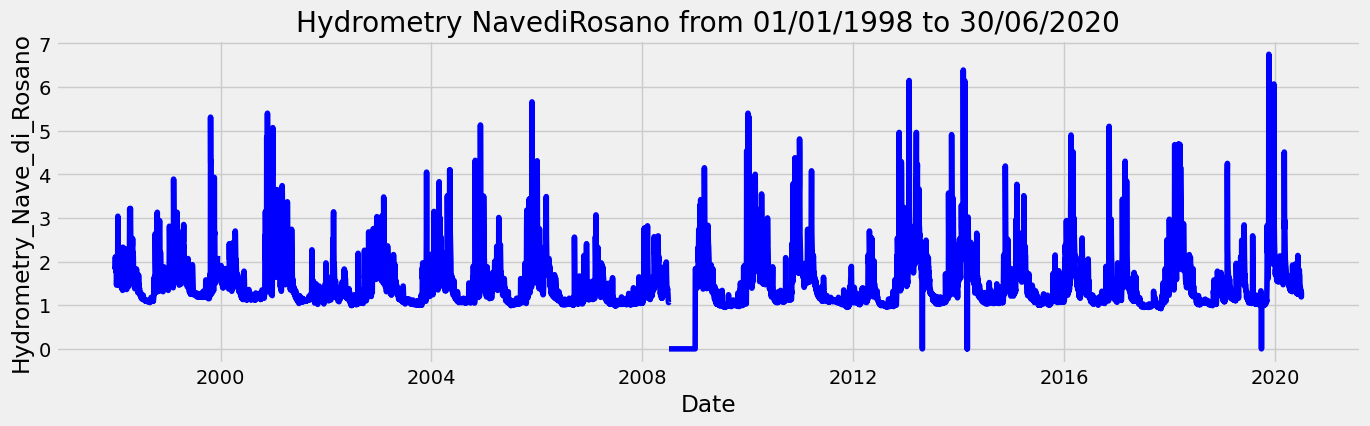

In [68]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Hydrometry_Nave_di_Rosano', dpi=100, color="blue"):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(data, x=data['Date'], y=data['Hydrometry_Nave_di_Rosano'], title='Hydrometry NavediRosano from 01/01/1998 to 30/06/2020')

In [69]:
# data['year'] = data.Date.dt.year
# data['month'] = data.Date.dt.month
# data['day'] = data.Date.dt.day

In [70]:
data

,Date,Hydrometry_Nave_di_Rosano
0,1998-01-01,1.82
1,1998-01-02,1.94
2,1998-01-03,2.11
3,1998-01-04,1.84
4,1998-01-05,1.88
...,...,...
8212,2020-06-26,1.34
8213,2020-06-27,1.21
8214,2020-06-28,1.30
8215,2020-06-29,1.19


In [72]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")


In [73]:
data.set_index('Date', inplace=True)


In [74]:
data

,Hydrometry_Nave_di_Rosano
Date,
1998-01-01,1.82
1998-01-02,1.94
1998-01-03,2.11
1998-01-04,1.84
1998-01-05,1.88
...,...
2020-06-26,1.34
2020-06-27,1.21
2020-06-28,1.30


In [75]:
ts = data['Hydrometry_Nave_di_Rosano']

In [76]:
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

In [77]:
def calculate_aic(model, p, d, q):
    try:
        model = ARIMA(train, order=(p, d, q)).fit()
        return model.aic
    except:
        return np.inf


def calculate_rmse(model, p, d, q):
    try:
        model = ARIMA(train, order=(p, d, q)).fit()
        forecast = model.forecast(steps=len(test))
        return mean_squared_error(test, forecast, squared=False)
    except:
        return np.inf


best_ar_model = None
best_ma_model = None
best_arma_model = None
best_arima_model = None

best_ar_aic = np.inf
best_ma_aic = np.inf
best_arma_aic = np.inf
best_arima_aic = np.inf


for p in range(6):  
    for q in range(6):  
        for d in range(3): 
            if q == 0 and d == 0:
                aic = calculate_aic('AR', p, 0, 0)
                if aic < best_ar_aic:
                    best_ar_aic = aic
                    best_ar_model = (p, 0, 0)
            elif p == 0 and d == 0:
                aic = calculate_aic('MA', 0, 0, q)
                if aic < best_ma_aic:
                    best_ma_aic = aic
                    best_ma_model = (0, 0, q)
            elif p != 0 and q != 0 and d == 0:
                aic = calculate_aic('ARMA', p, 0, q)
                if aic < best_arma_aic:
                    best_arma_aic = aic
                    best_arma_model = (p, 0, q)
            else:
                aic = calculate_aic('ARIMA', p, d, q)
                if aic < best_arima_aic:
                    best_arima_aic = aic
                    best_arima_model = (p, d, q)


best_ar_rmse = calculate_rmse('AR', *best_ar_model)
best_ma_rmse = calculate_rmse('MA', *best_ma_model)
best_arma_rmse = calculate_rmse('ARMA', *best_arma_model)
best_arima_rmse = calculate_rmse('ARIMA', *best_arima_model)

print("Best AR model:", best_ar_model, "with AIC:", best_ar_aic, "and RMSE:", best_ar_rmse)
print("Best MA model:", best_ma_model, "with AIC:", best_ma_aic, "and RMSE:", best_ma_rmse)
print("Best ARMA model:", best_arma_model, "with AIC:", best_arma_aic, "and RMSE:", best_arma_rmse)
print("Best ARIMA model:", best_arima_model, "with AIC:", best_arima_aic, "and RMSE:", best_arima_rmse)

Best AR model: (5, 0, 0) with AIC: 1546.0270391894514 and RMSE: inf
Best MA model: (0, 0, 5) with AIC: 2558.0730273737618 and RMSE: inf
Best ARMA model: (4, 0, 2) with AIC: 1406.0177413502017 and RMSE: inf
Best ARIMA model: (4, 1, 5) with AIC: 1436.6415802930392 and RMSE: inf
